In [1]:
#Loading the Data
import pandas as pd
#Loading the dataset with the appropriate encoding
file_path = '/content/SentimentData.csv'
data = pd.read_csv(file_path, encoding='latin1')
#Displaying the top rows of the dataset
data.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [2]:
#Checking for missing values in the dataset
missing_values = data.isnull().sum()
#Displaying the missing values
missing_values

,0
textID,0
text,1
selected_text,1
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


In [3]:
#Dropping rows with missing values in 'text' and 'selected_text' columns
data_cleaned = data.dropna(subset=['text', 'selected_text'])
#Verifying that missing values have been handled
missing_values_after = data_cleaned.isnull().sum()
missing_values_after

,0
textID,0
text,0
selected_text,0
sentiment,0
Time of Tweet,0
Age of User,0
Country,0
Population -2020,0
Land Area (Km²),0
Density (P/Km²),0


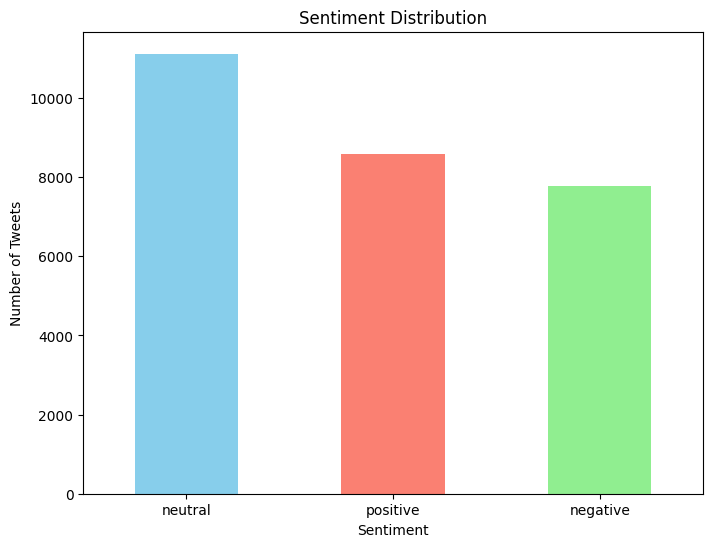

In [4]:
import matplotlib.pyplot as plt
#Creating a bar chart for sentiment distribution
sentiment_counts = data_cleaned['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

<Figure size 1000x600 with 0 Axes>

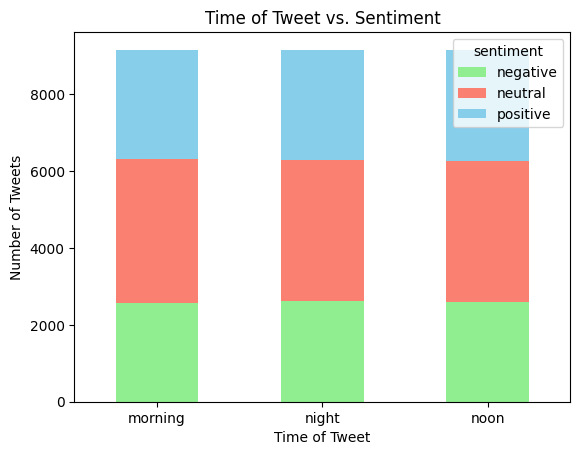

In [5]:
#Creating a stacked bar chart for Time of Tweet vs. Sentiment
time_sentiment = data_cleaned.groupby(['Time of Tweet', 'sentiment']).size().unstack()
plt.figure(figsize=(10, 6))
time_sentiment.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon', 'skyblue'])
plt.title('Time of Tweet vs. Sentiment')
plt.xlabel('Time of Tweet')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=0)
plt.show()

<Figure size 1200x600 with 0 Axes>

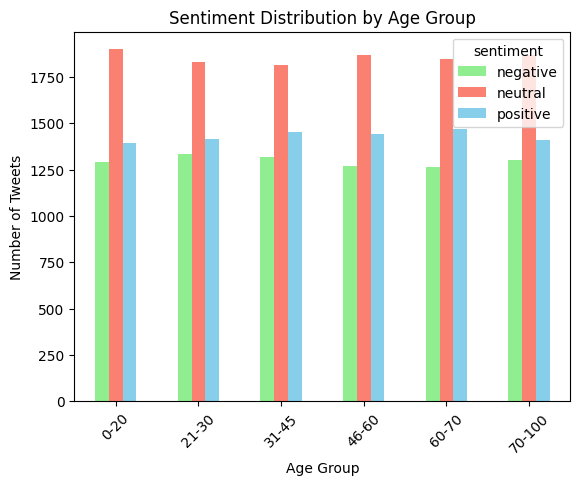

In [6]:
#Creating a grouped bar chart for Sentiment Distribution by Age Group
age_sentiment = data_cleaned.groupby(['Age of User', 'sentiment']).size().unstack()
plt.figure(figsize=(12, 6))
age_sentiment.plot(kind='bar', color=['lightgreen', 'salmon', 'skyblue'])
plt.title('Sentiment Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

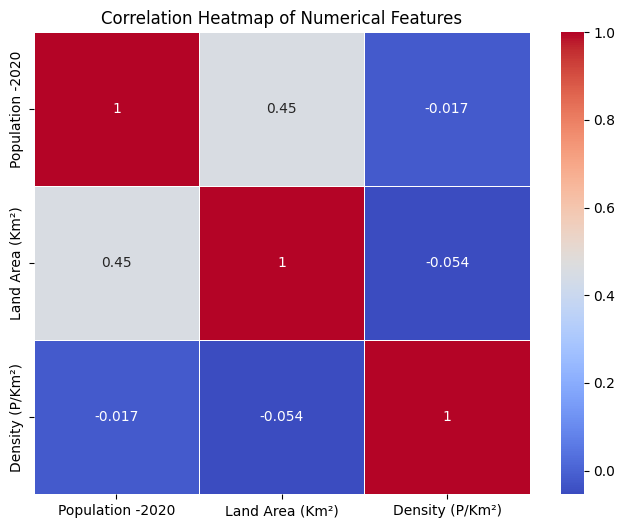

In [7]:
import seaborn as sns
#Selecting numerical columns for the heatmap
numerical_columns = ['Population -2020', 'Land Area (Km²)', 'Density (P/Km²)']
#Creating a correlation matrix
correlation_matrix = data_cleaned[numerical_columns].corr()
#Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

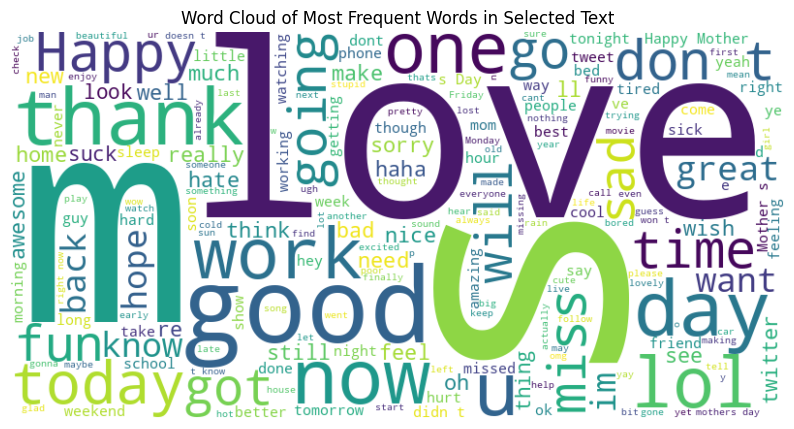

In [9]:
from wordcloud import WordCloud
#Generating a word cloud for the 'selected_text' column
text_data = ' '.join(data_cleaned['selected_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
#Displaying the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words in Selected Text')
plt.show()

In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')
#Downloading necessary NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#Initializing lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
#Defining a function for preprocessing text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Removing stop words and lemmatize the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    # Joining the tokens back into a single string
    return ' '.join(tokens)
#Applying preprocessing to the 'selected_text' column
data_cleaned['processed_text'] = data_cleaned['selected_text'].apply(preprocess_text)
#Keeping only the relevant features: 'processed_text' and 'sentiment'
final_data = data_cleaned[['processed_text', 'sentiment']]
#Displaying the first few rows of the preprocessed data
final_data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,processed_text,sentiment
0,responded going,neutral
1,sooo sad,negative
2,bullying,negative
3,leave alone,negative
4,son,negative


In [12]:
from sklearn.model_selection import train_test_split
X = final_data['processed_text']  #Features
y = final_data['sentiment']       #Labels
#Dividing the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Displaying the size of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21984,) (5496,) (21984,) (5496,)


Training Accuracy: 0.8674
Testing Accuracy: 0.7966
Precision: 0.8004
Recall: 0.7966
F1 Score: 0.7962
ROC AUC (Micro-average): 0.5668


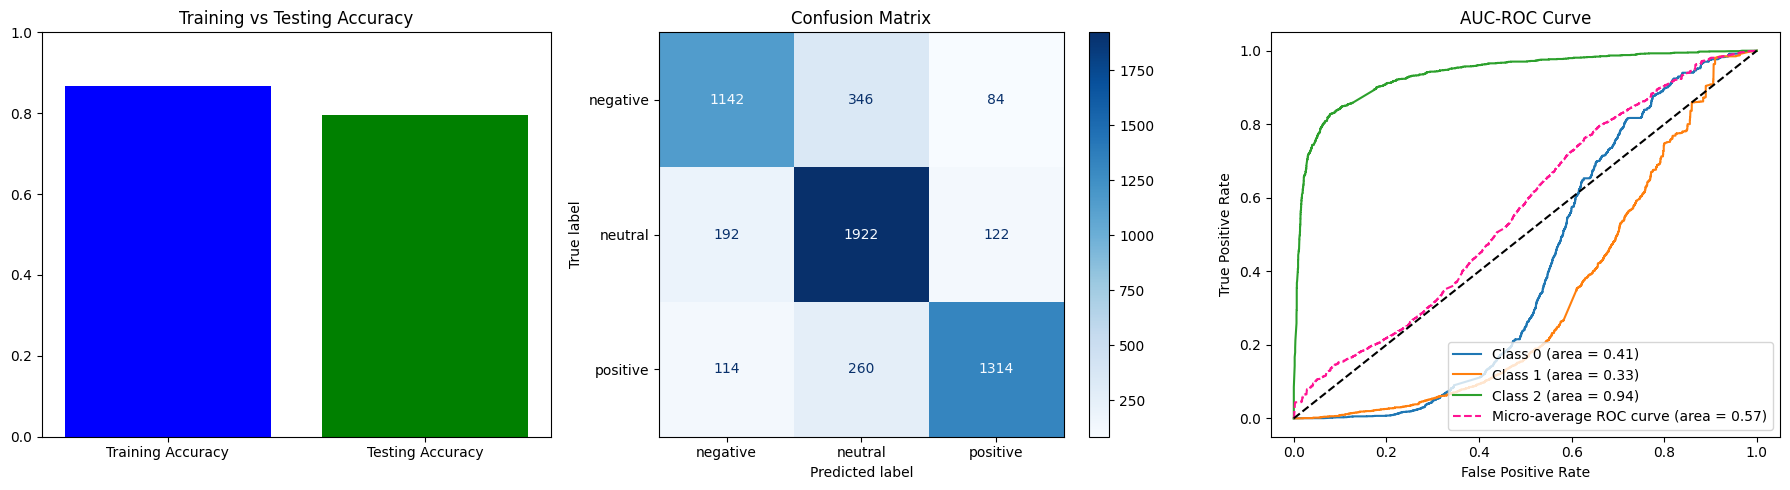

In [14]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import label_binarize
from sklearn.feature_extraction.text import TfidfVectorizer
#Converting labels to binary form for AUC-ROC curve
y_train_bin = label_binarize(y_train, classes=['neutral', 'negative', 'positive'])
y_test_bin = label_binarize(y_test, classes=['neutral', 'negative', 'positive'])
#Converting text data to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
#Initializing the Logistic Regression model
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train_tfidf, y_train)
#Predictions
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)
#Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
#Calculating ROC-AUC for each class and micro-average
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test_tfidf)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model.predict_proba(X_test_tfidf).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Printing metrics
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC (Micro-average): {roc_auc["micro"]:.4f}')
#Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
#Training vs Testing Accuracy plot
axs[0].bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
axs[0].set_title('Training vs Testing Accuracy')
axs[0].set_ylim([0, 1])
#Confusion Matrix visualization
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix')
#AUC-ROC curve visualization
for i in range(3):
    axs[2].plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
axs[2].plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle='--')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title('AUC-ROC Curve')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend(loc="lower right")
plt.tight_layout()
plt.show()

Training Accuracy: 0.9770
Testing Accuracy: 0.7962
Precision: 0.7990
Recall: 0.7962
F1 Score: 0.7966
ROC AUC (Micro-average): 0.5535


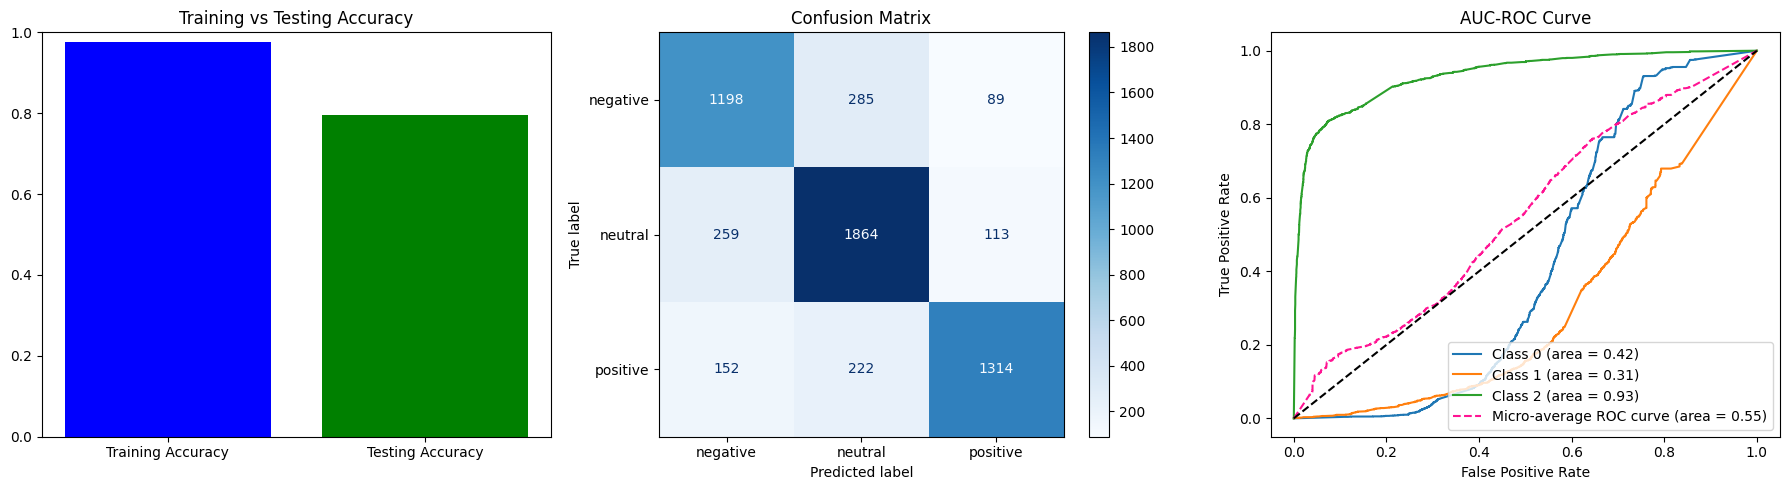

In [15]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier
#Initializing the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)
#Predictions
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)
#Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
#Calculating ROC-AUC for each class and micro-average
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test_tfidf)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model.predict_proba(X_test_tfidf).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Printing metrics
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC (Micro-average): {roc_auc["micro"]:.4f}')
#Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
#Training vs Testing Accuracy plot
axs[0].bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
axs[0].set_title('Training vs Testing Accuracy')
axs[0].set_ylim([0, 1])
#Confusion Matrix visualization
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix')
#AUC-ROC curve visualization
for i in range(3):
    axs[2].plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
axs[2].plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle='--')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title('AUC-ROC Curve')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend(loc="lower right")
plt.tight_layout()
plt.show()

Training Accuracy: 0.8590
Testing Accuracy: 0.7802
Precision: 0.8070
Recall: 0.7802
F1 Score: 0.7770
ROC AUC (Micro-average): 0.5498


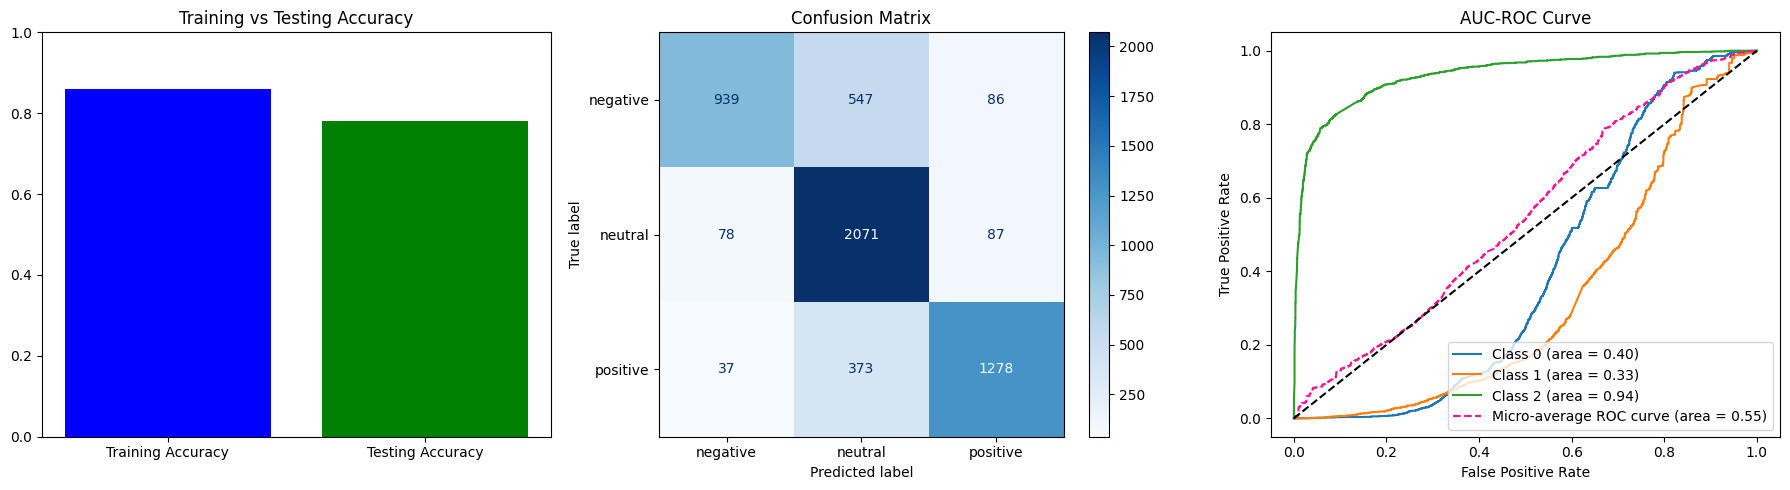

In [16]:
#Naive Bayes
from sklearn.naive_bayes import MultinomialNB
#Initializing the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)
#Predictions
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)
#Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
#Calculating ROC-AUC for each class and micro-average
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test_tfidf)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model.predict_proba(X_test_tfidf).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Printing metrics
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC (Micro-average): {roc_auc["micro"]:.4f}')
#Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
#Training vs Testing Accuracy plot
axs[0].bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
axs[0].set_title('Training vs Testing Accuracy')
axs[0].set_ylim([0, 1])
#Confusion Matrix visualization
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix')
#AUC-ROC curve visualization
for i in range(3):
    axs[2].plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
axs[2].plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle='--')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title('AUC-ROC Curve')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend(loc="lower right")
plt.tight_layout()
plt.show()

Training Accuracy: 0.6989
Testing Accuracy: 0.6783
Precision: 0.7521
Recall: 0.6783
F1 Score: 0.6637
ROC AUC (Micro-average): 0.5484


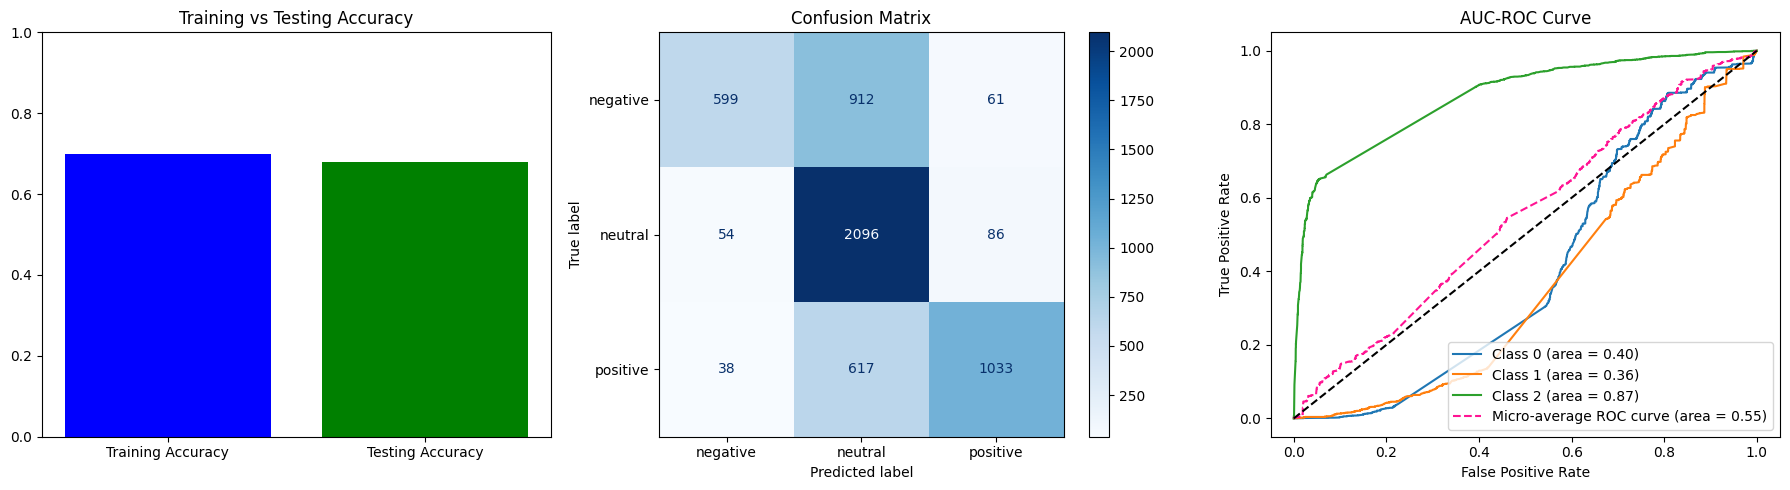

In [17]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the Gradient Boosting model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_tfidf, y_train)
#Predictions
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)
#Calculating metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
#Calculating ROC-AUC for each class and micro-average
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], model.predict_proba(X_test_tfidf)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), model.predict_proba(X_test_tfidf).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Printing metrics
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC (Micro-average): {roc_auc["micro"]:.4f}')
#Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
#Training vs Testing Accuracy plot
axs[0].bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
axs[0].set_title('Training vs Testing Accuracy')
axs[0].set_ylim([0, 1])
#Confusion Matrix visualization
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix')
#AUC-ROC curve visualization
for i in range(3):
    axs[2].plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
axs[2].plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle='--')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title('AUC-ROC Curve')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend(loc="lower right")
plt.tight_layout()
plt.show()

Epoch 1/5
344/344 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6156 - loss: 0.8450 - val_accuracy: 0.7851 - val_loss: 0.5518
Epoch 2/5
344/344 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.8278 - loss: 0.4545 - val_accuracy: 0.8059 - val_loss: 0.5219
Epoch 3/5
344/344 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8631 - loss: 0.3704 - val_accuracy: 0.8013 - val_loss: 0.5316
Epoch 4/5
344/344 ━━━━━━━━━━━━━━━━━━━━ 14s 28ms/step - accuracy: 0.8809 - loss: 0.3307 - val_accuracy: 0.7946 - val_loss: 0.5628
Epoch 5/5
344/344 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8864 - loss: 0.3039 - val_accuracy: 0.8000 - val_loss: 0.5781
687/687 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step
172/172 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Training Accuracy: 0.9098
Testing Accuracy: 0.8000
Precision: 0.8014
Recall: 0.8000
F1 Score: 0.8003
ROC AUC (Micro-average): 0.9206


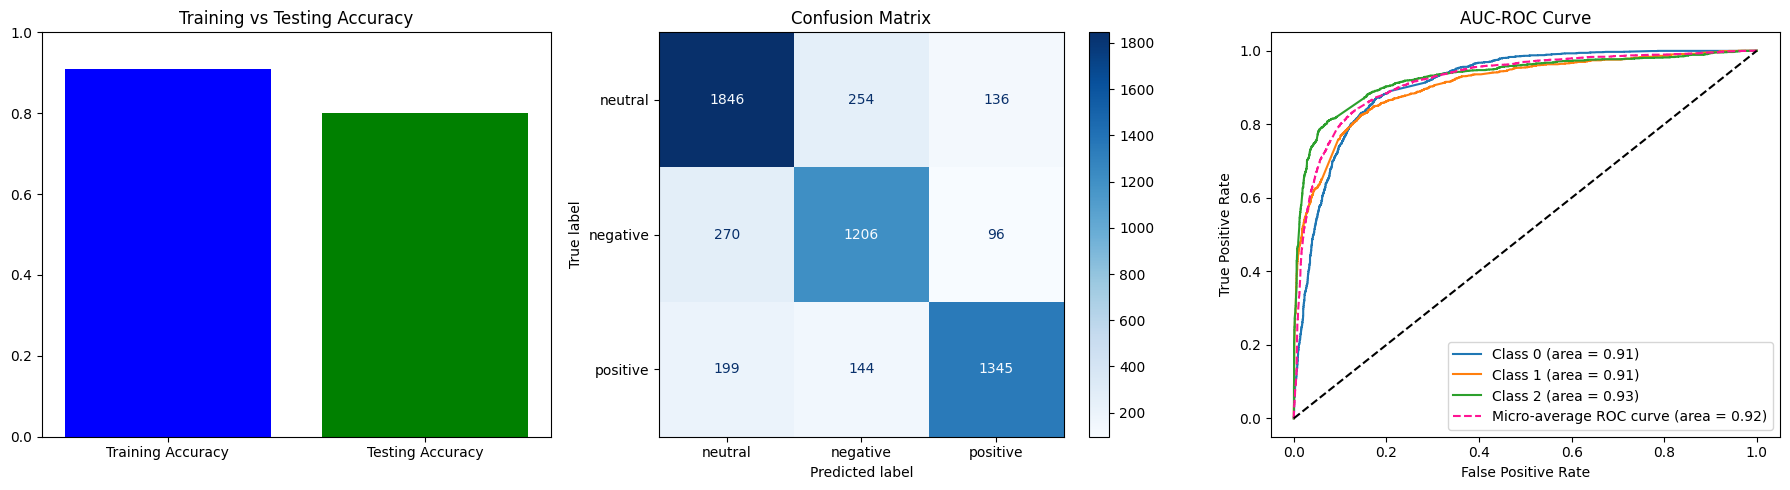

In [18]:
#LSTM
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
#Preparing the data for the LSTM model
max_features = 5000  #Vocabulary size
maxlen = 100  #Maximum length of sequences
#Tokenizing the text data
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
#Padding the sequences to ensure uniform length
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_seq, maxlen=maxlen)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_seq, maxlen=maxlen)
#Defining the LSTM model
model = Sequential()
model.add(Embedding(input_dim=max_features, output_dim=128, input_length=maxlen))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(LSTM(64))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output classes for multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
#Training the model
history = model.fit(X_train_padded, y_train_bin, epochs=5, batch_size=64, validation_data=(X_test_padded, y_test_bin))
#Predictions
y_train_pred = model.predict(X_train_padded)
y_test_pred = model.predict(X_test_padded)
#Converting predictions to class labels
y_train_pred_class = np.argmax(y_train_pred, axis=1)
y_test_pred_class = np.argmax(y_test_pred, axis=1)
#Calculating metrics
train_accuracy = accuracy_score(np.argmax(y_train_bin, axis=1), y_train_pred_class)
test_accuracy = accuracy_score(np.argmax(y_test_bin, axis=1), y_test_pred_class)
precision = precision_score(np.argmax(y_test_bin, axis=1), y_test_pred_class, average='weighted')
recall = recall_score(np.argmax(y_test_bin, axis=1), y_test_pred_class, average='weighted')
f1 = f1_score(np.argmax(y_test_bin, axis=1), y_test_pred_class, average='weighted')
#Calculating ROC-AUC for each class and micro-average
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_test_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_test_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
#Printing metrics
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC AUC (Micro-average): {roc_auc["micro"]:.4f}')
#Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
#Training vs Testing Accuracy plot
axs[0].bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'green'])
axs[0].set_title('Training vs Testing Accuracy')
axs[0].set_ylim([0, 1])
#Confusion Matrix visualization
cm = confusion_matrix(np.argmax(y_test_bin, axis=1), y_test_pred_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['neutral', 'negative', 'positive'])
disp.plot(ax=axs[1], cmap='Blues')
axs[1].set_title('Confusion Matrix')
#AUC-ROC curve visualization
for i in range(3):
    axs[2].plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')
axs[2].plot(fpr["micro"], tpr["micro"], label=f'Micro-average ROC curve (area = {roc_auc["micro"]:.2f})', color='deeppink', linestyle='--')
axs[2].plot([0, 1], [0, 1], 'k--')
axs[2].set_title('AUC-ROC Curve')
axs[2].set_xlabel('False Positive Rate')
axs[2].set_ylabel('True Positive Rate')
axs[2].legend(loc="lower right")
plt.tight_layout()
plt.show()

In [20]:
#Saving the model
model.save('best_lstm_model.keras')
print("Model saved successfully!")

Model saved successfully!


In [21]:
from tensorflow.keras.models import load_model
#Loading the model from the file
loaded_model = load_model('best_lstm_model.keras')
print("Model loaded successfully!")

Model loaded successfully!


In [24]:
#Final Model
# Function to preprocess the input text
def preprocess_input_text(text, tokenizer, maxlen):
    # Tokenize and pad the input text
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=maxlen)
    return padded_sequence
# Function to predict sentiment
def predict_sentiment(model, tokenizer, text, maxlen):
    # Preprocess the input text
    processed_text = preprocess_input_text(text, tokenizer, maxlen)
    #Predicting the sentiment
    prediction = model.predict(processed_text)
    #Converting the prediction to a label
    sentiment_label = np.argmax(prediction, axis=1)[0]
    sentiment_map = {0: 'neutral', 1: 'negative', 2: 'positive'}
    return sentiment_map[sentiment_label]
#Prompting the user to enter text
user_input = input("Enter text to analyze sentiment: ")
#Predicting the sentiment
predicted_sentiment = predict_sentiment(loaded_model, tokenizer, user_input, maxlen)
print(f"The predicted sentiment is: {predicted_sentiment}")

Enter text to analyze sentiment: I want to kill you.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The predicted sentiment is: negative
